In [1]:
# Fixed visualization for the full dataset with response times
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")


In [2]:
# Load the CORRECT data file with response times
csv_file = 'extracted_data_with_time.csv'  # This is the 5.4GB file with full data
print(f"Loading data from: {csv_file}")

try:
    # Load data in chunks to avoid memory issues
    chunk_size = 100000
    chunks = []
    
    print("Loading data in chunks...")
    for i, chunk in enumerate(pd.read_csv(csv_file, chunksize=chunk_size)):
        chunks.append(chunk)
        if (i + 1) % 10 == 0:
            print(f"  Loaded {(i + 1) * chunk_size:,} records...")
        if i >= 50:  # Limit to ~5M records for analysis
            break
    
    df = pd.concat(chunks, ignore_index=True)
    print(f"✅ Data loaded successfully!")
    print(f"📊 Total records loaded: {len(df):,}")
    print(f"📋 Columns: {list(df.columns)}")
    print(f"💾 Data shape: {df.shape}")
    
    # Quick data check
    print(f"\n🔍 Quick Data Check:")
    print(f"  • Response times > 0: {(df['Total_Response_Time_MS'] > 0).sum():,}")
    print(f"  • Percentage with response times: {(df['Total_Response_Time_MS'] > 0).sum()/len(df)*100:.1f}%")
    
except FileNotFoundError:
    print(f"❌ File {csv_file} not found. Please make sure the extraction was completed.")
    df = None
except Exception as e:
    print(f"❌ Error loading data: {e}")
    df = None


Loading data from: extracted_data_with_time.csv
Loading data in chunks...
  Loaded 1,000,000 records...
  Loaded 2,000,000 records...
  Loaded 3,000,000 records...
  Loaded 4,000,000 records...
  Loaded 5,000,000 records...
✅ Data loaded successfully!
📊 Total records loaded: 5,100,000
📋 Columns: ['Time', 'IP', 'Method', 'URL', 'Status', 'Response_Size', 'Response_Time_Seconds', 'Response_Time_Microseconds', 'Total_Response_Time_MS']
💾 Data shape: (5100000, 9)

🔍 Quick Data Check:
  • Response times > 0: 5,100,000
  • Percentage with response times: 100.0%



📊 COMPREHENSIVE RESPONSE TIME VISUALIZATIONS
📈 Analyzing 5,100,000 records with response times


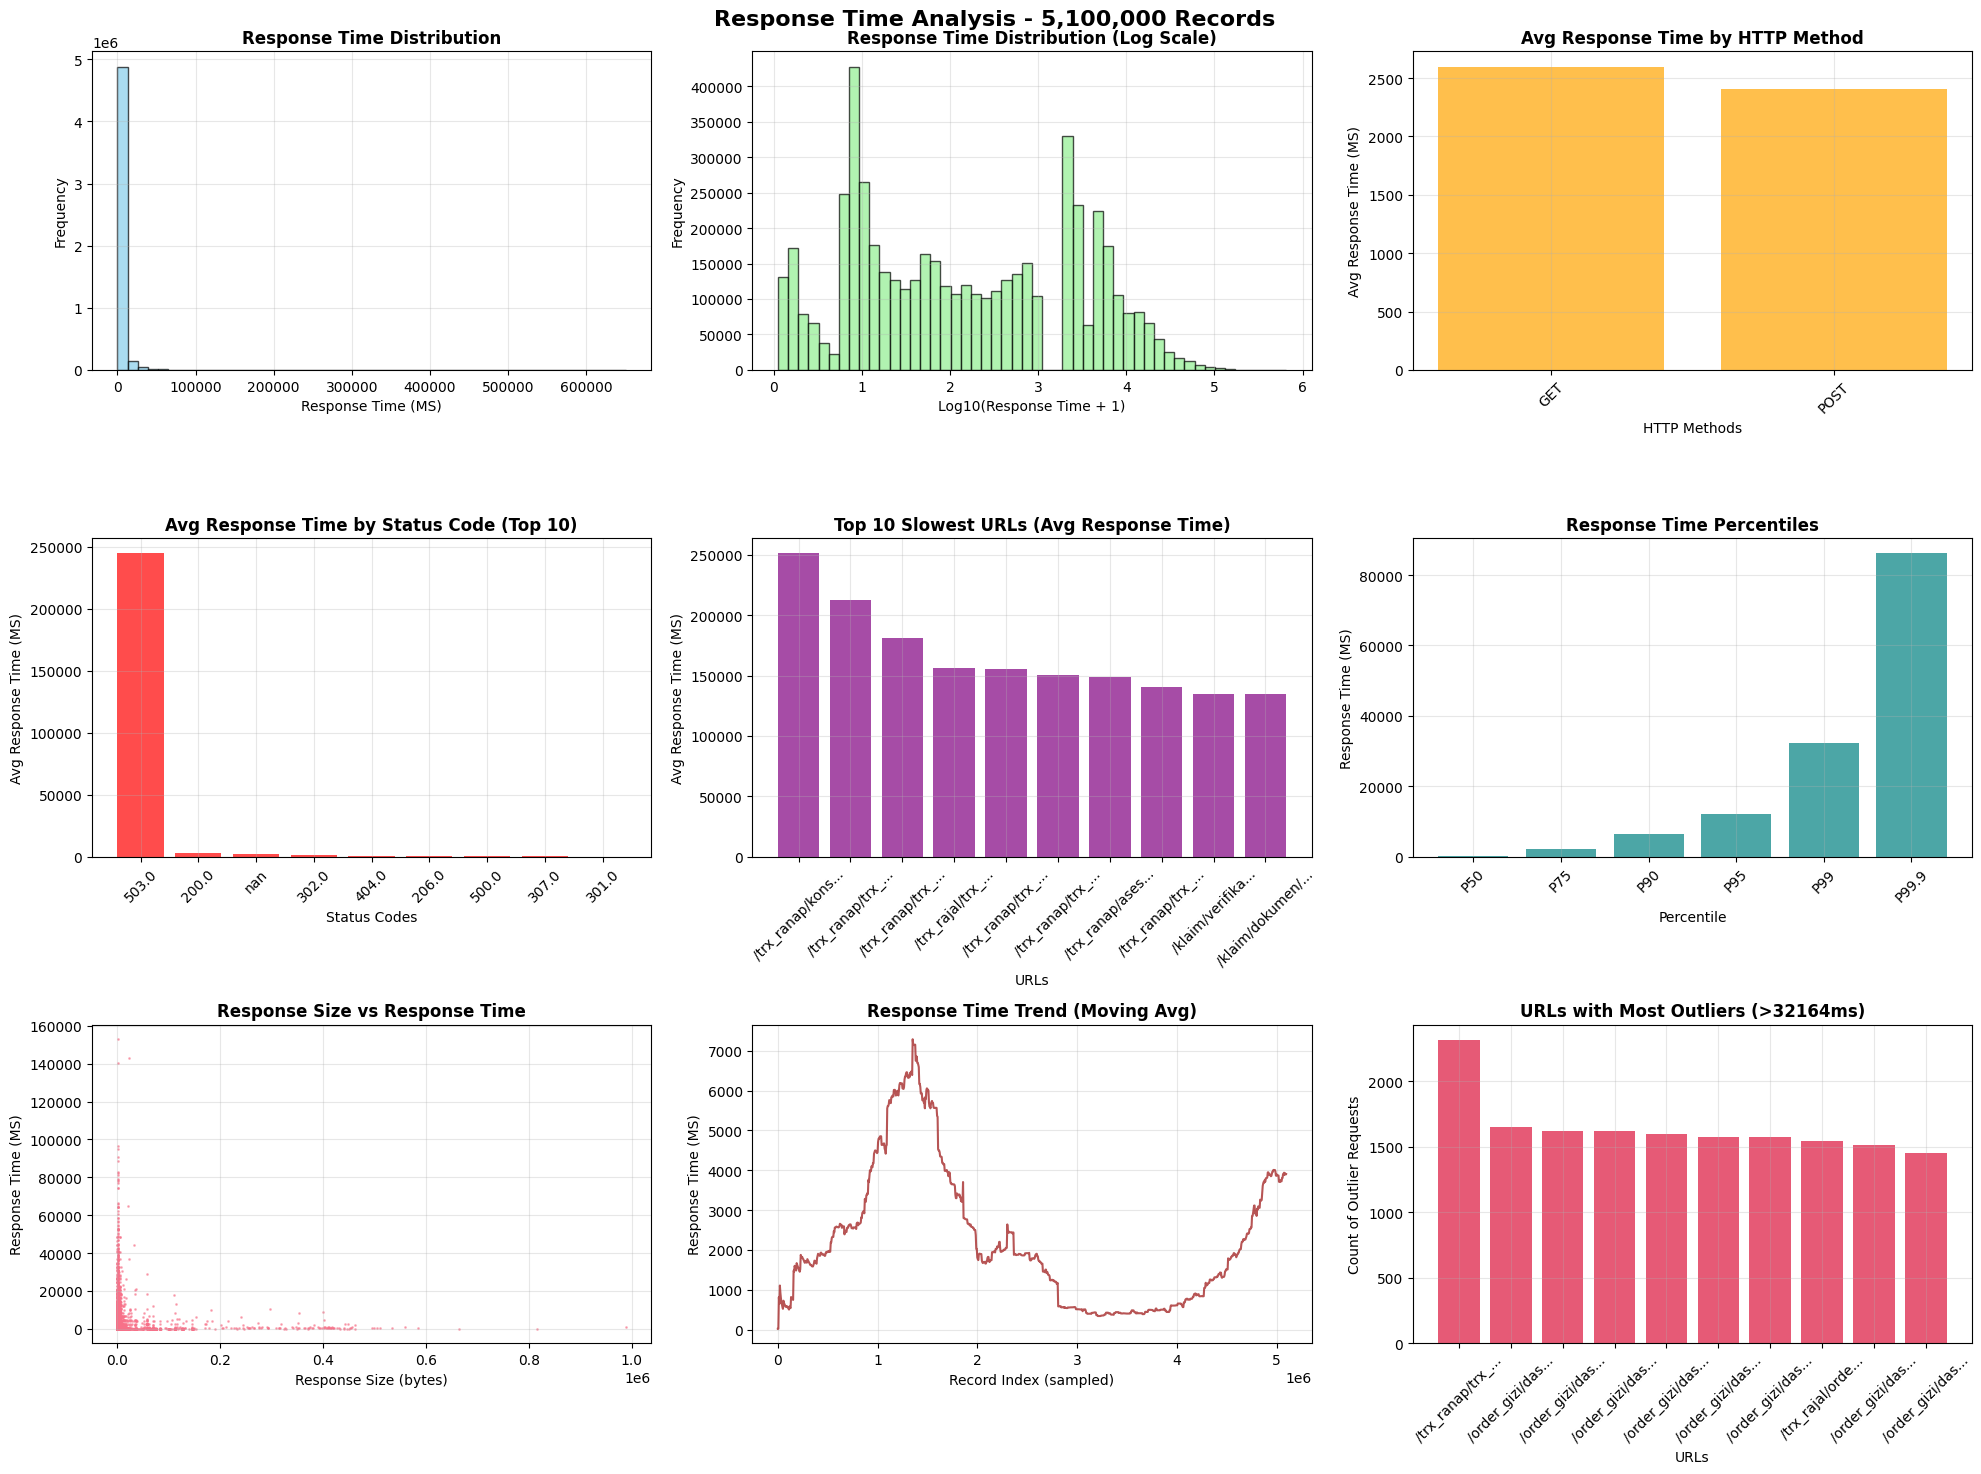


✅ Visualizations completed for 5,100,000 records with response times

📊 SUMMARY STATISTICS:
  • Average response time: 2474.33 ms
  • Median response time: 96.91 ms
  • 95th percentile: 12205.08 ms
  • 99th percentile: 32164.48 ms
  • Maximum response time: 650404.12 ms
  • Minimum response time: 0.12 ms


In [3]:
# FIXED COMPREHENSIVE VISUALIZATIONS
print("\n📊 COMPREHENSIVE RESPONSE TIME VISUALIZATIONS")
print("=" * 60)

if df is not None and len(df) > 0:
    # Filter data with valid response times
    non_zero_df = df[df['Total_Response_Time_MS'] > 0]
    
    if len(non_zero_df) > 0:
        print(f"📈 Analyzing {len(non_zero_df):,} records with response times")
        
        # Create comprehensive visualization
        fig, axes = plt.subplots(3, 3, figsize=(20, 15))
        fig.suptitle(f'Response Time Analysis - {len(non_zero_df):,} Records', fontsize=16, fontweight='bold')
        
        # 1. Response time distribution
        axes[0, 0].hist(non_zero_df['Total_Response_Time_MS'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Response Time Distribution', fontweight='bold')
        axes[0, 0].set_xlabel('Response Time (MS)')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Log scale distribution
        log_data = np.log10(non_zero_df['Total_Response_Time_MS'] + 1)
        axes[0, 1].hist(log_data, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0, 1].set_title('Response Time Distribution (Log Scale)', fontweight='bold')
        axes[0, 1].set_xlabel('Log10(Response Time + 1)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Response time by HTTP method
        if 'Method' in non_zero_df.columns and non_zero_df['Method'].nunique() > 1:
            method_avg = non_zero_df.groupby('Method')['Total_Response_Time_MS'].mean().sort_values(ascending=False)
            axes[0, 2].bar(range(len(method_avg)), method_avg.values, color='orange', alpha=0.7)
            axes[0, 2].set_title('Avg Response Time by HTTP Method', fontweight='bold')
            axes[0, 2].set_xlabel('HTTP Methods')
            axes[0, 2].set_ylabel('Avg Response Time (MS)')
            axes[0, 2].set_xticks(range(len(method_avg)))
            axes[0, 2].set_xticklabels(method_avg.index, rotation=45)
            axes[0, 2].grid(True, alpha=0.3)
        else:
            axes[0, 2].text(0.5, 0.5, 'Single HTTP Method', ha='center', va='center', transform=axes[0, 2].transAxes)
            axes[0, 2].set_title('HTTP Method Analysis', fontweight='bold')
        
        # 4. Response time by status code (FIXED VERSION)
        if 'Status' in non_zero_df.columns:
            # Convert Status to string to handle any data type issues
            non_zero_df_copy = non_zero_df.copy()
            non_zero_df_copy['Status'] = non_zero_df_copy['Status'].astype(str)
            
            status_avg = non_zero_df_copy.groupby('Status')['Total_Response_Time_MS'].mean().sort_values(ascending=False)
            
            # FIXED: Use .iloc for positional slicing instead of label-based slicing
            top_10_status = status_avg.iloc[:10]  # This is the fix!
            
            if len(top_10_status) > 0:
                axes[1, 0].bar(range(len(top_10_status)), top_10_status.values, color='red', alpha=0.7)
                axes[1, 0].set_title('Avg Response Time by Status Code (Top 10)', fontweight='bold')
                axes[1, 0].set_xlabel('Status Codes')
                axes[1, 0].set_ylabel('Avg Response Time (MS)')
                axes[1, 0].set_xticks(range(len(top_10_status)))
                axes[1, 0].set_xticklabels(top_10_status.index, rotation=45)
                axes[1, 0].grid(True, alpha=0.3)
            else:
                axes[1, 0].text(0.5, 0.5, 'No Status Data', ha='center', va='center', transform=axes[1, 0].transAxes)
                axes[1, 0].set_title('Status Code Analysis', fontweight='bold')
        else:
            axes[1, 0].text(0.5, 0.5, 'No Status Data', ha='center', va='center', transform=axes[1, 0].transAxes)
            axes[1, 0].set_title('Status Code Analysis', fontweight='bold')
        
        # 5. Top 10 slowest URLs (FIXED VERSION)
        url_avg = non_zero_df.groupby('URL')['Total_Response_Time_MS'].mean().sort_values(ascending=False)
        top_10_urls = url_avg.iloc[:10]  # FIXED: Use .iloc instead of [:10]
        
        if len(top_10_urls) > 0:
            axes[1, 1].bar(range(len(top_10_urls)), top_10_urls.values, color='purple', alpha=0.7)
            axes[1, 1].set_title('Top 10 Slowest URLs (Avg Response Time)', fontweight='bold')
            axes[1, 1].set_xlabel('URLs')
            axes[1, 1].set_ylabel('Avg Response Time (MS)')
            # Shorten URL names for display
            short_urls = [url[:15] + '...' if len(url) > 15 else url for url in top_10_urls.index]
            axes[1, 1].set_xticks(range(len(top_10_urls)))
            axes[1, 1].set_xticklabels(short_urls, rotation=45)
            axes[1, 1].grid(True, alpha=0.3)
        else:
            axes[1, 1].text(0.5, 0.5, 'No URL Data', ha='center', va='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('URL Analysis', fontweight='bold')
        
        # 6. Response time percentiles
        percentiles = [50, 75, 90, 95, 99, 99.9]
        percentile_values = [np.percentile(non_zero_df['Total_Response_Time_MS'], p) for p in percentiles]
        
        axes[1, 2].bar(range(len(percentiles)), percentile_values, color='teal', alpha=0.7)
        axes[1, 2].set_title('Response Time Percentiles', fontweight='bold')
        axes[1, 2].set_xlabel('Percentile')
        axes[1, 2].set_ylabel('Response Time (MS)')
        axes[1, 2].set_xticks(range(len(percentiles)))
        axes[1, 2].set_xticklabels([f'P{p}' for p in percentiles], rotation=45)
        axes[1, 2].grid(True, alpha=0.3)
        
        # 7. Response size vs response time scatter (if available)
        if 'Response_Size' in non_zero_df.columns:
            # Convert Response_Size to numeric and filter valid values
            response_sizes = pd.to_numeric(non_zero_df['Response_Size'], errors='coerce')
            valid_sizes = response_sizes.notna() & (response_sizes > 0)
            
            if valid_sizes.sum() > 1000:  # Only plot if we have enough valid data points
                # Sample for performance
                sample_size = min(10000, valid_sizes.sum())
                sample_idx = np.random.choice(non_zero_df[valid_sizes].index, sample_size, replace=False)
                
                sample_response_time = non_zero_df.loc[sample_idx, 'Total_Response_Time_MS']
                sample_response_size = response_sizes.loc[sample_idx]
                
                axes[2, 0].scatter(sample_response_size, sample_response_time, alpha=0.5, s=1)
                axes[2, 0].set_title('Response Size vs Response Time', fontweight='bold')
                axes[2, 0].set_xlabel('Response Size (bytes)')
                axes[2, 0].set_ylabel('Response Time (MS)')
                axes[2, 0].grid(True, alpha=0.3)
            else:
                axes[2, 0].text(0.5, 0.5, 'Insufficient Size Data', ha='center', va='center', transform=axes[2, 0].transAxes)
                axes[2, 0].set_title('Response Size Analysis', fontweight='bold')
        else:
            axes[2, 0].text(0.5, 0.5, 'No Response Size Data', ha='center', va='center', transform=axes[2, 0].transAxes)
            axes[2, 0].set_title('Response Size Analysis', fontweight='bold')
        
        # 8. Response time trend (sampled)
        if len(non_zero_df) > 1000:
            step = max(1, len(non_zero_df) // 1000)
            trend_data = non_zero_df.iloc[::step]['Total_Response_Time_MS'].rolling(100, min_periods=1).mean()
            axes[2, 1].plot(trend_data, color='brown', alpha=0.8)
            axes[2, 1].set_title('Response Time Trend (Moving Avg)', fontweight='bold')
            axes[2, 1].set_xlabel('Record Index (sampled)')
            axes[2, 1].set_ylabel('Response Time (MS)')
            axes[2, 1].grid(True, alpha=0.3)
        else:
            axes[2, 1].text(0.5, 0.5, 'Insufficient Data for Trend', ha='center', va='center', transform=axes[2, 1].transAxes)
            axes[2, 1].set_title('Response Time Trend', fontweight='bold')
        
        # 9. Extreme outliers analysis
        outlier_threshold = np.percentile(non_zero_df['Total_Response_Time_MS'], 99)
        outliers = non_zero_df[non_zero_df['Total_Response_Time_MS'] > outlier_threshold]
        
        if len(outliers) > 0:
            outlier_urls = outliers['URL'].value_counts()
            top_outlier_urls = outlier_urls.iloc[:10]  # FIXED: Use .iloc instead of [:10]
            
            if len(top_outlier_urls) > 0:
                axes[2, 2].bar(range(len(top_outlier_urls)), top_outlier_urls.values, color='crimson', alpha=0.7)
                axes[2, 2].set_title(f'URLs with Most Outliers (>{outlier_threshold:.0f}ms)', fontweight='bold')
                axes[2, 2].set_xlabel('URLs')
                axes[2, 2].set_ylabel('Count of Outlier Requests')
                short_urls = [url[:15] + '...' if len(url) > 15 else url for url in top_outlier_urls.index]
                axes[2, 2].set_xticks(range(len(top_outlier_urls)))
                axes[2, 2].set_xticklabels(short_urls, rotation=45)
                axes[2, 2].grid(True, alpha=0.3)
            else:
                axes[2, 2].text(0.5, 0.5, 'No significant outliers', ha='center', va='center', transform=axes[2, 2].transAxes)
                axes[2, 2].set_title('Outlier Analysis', fontweight='bold')
        else:
            axes[2, 2].text(0.5, 0.5, 'No outliers found', ha='center', va='center', transform=axes[2, 2].transAxes)
            axes[2, 2].set_title('Outlier Analysis', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n✅ Visualizations completed for {len(non_zero_df):,} records with response times")
        
        # Print summary statistics
        print(f"\n📊 SUMMARY STATISTICS:")
        print(f"  • Average response time: {non_zero_df['Total_Response_Time_MS'].mean():.2f} ms")
        print(f"  • Median response time: {non_zero_df['Total_Response_Time_MS'].median():.2f} ms")
        print(f"  • 95th percentile: {np.percentile(non_zero_df['Total_Response_Time_MS'], 95):.2f} ms")
        print(f"  • 99th percentile: {np.percentile(non_zero_df['Total_Response_Time_MS'], 99):.2f} ms")
        print(f"  • Maximum response time: {non_zero_df['Total_Response_Time_MS'].max():.2f} ms")
        print(f"  • Minimum response time: {non_zero_df['Total_Response_Time_MS'].min():.2f} ms")
        
    else:
        print("❌ No records with response times > 0 found")
else:
    print("❌ No data available for visualization")


In [4]:
# TIME-BASED ANALYSIS (FIXED VERSION)
print("\n⏰ TIME-BASED ANALYSIS")
print("=" * 50)

if df is not None and len(df) > 0:
    # Filter data with valid response times
    non_zero_df = df[df['Total_Response_Time_MS'] > 0]
    
    if len(non_zero_df) > 0:
        try:
            # Convert time column to datetime
            df_time = non_zero_df.copy()
            df_time['DateTime'] = pd.to_datetime(df_time['Time'], format='%d/%b/%Y:%H:%M:%S %z', errors='coerce')
            
            # Filter records with valid datetime
            valid_time_df = df_time[df_time['DateTime'].notna()]
            
            if len(valid_time_df) > 0:
                # Extract time components
                valid_time_df = valid_time_df.copy()  # Avoid SettingWithCopyWarning
                valid_time_df['Hour'] = valid_time_df['DateTime'].dt.hour
                valid_time_df['DayOfWeek'] = valid_time_df['DateTime'].dt.dayofweek
                valid_time_df['Date'] = valid_time_df['DateTime'].dt.date
                
                print(f"\n📅 TIME RANGE ANALYSIS:")
                print(f"  • Records with valid timestamps: {len(valid_time_df):,}")
                print(f"  • First request: {valid_time_df['DateTime'].min()}")
                print(f"  • Last request: {valid_time_df['DateTime'].max()}")
                print(f"  • Total time span: {valid_time_df['DateTime'].max() - valid_time_df['DateTime'].min()}")
                print(f"  • Unique dates: {valid_time_df['Date'].nunique()}")
                
                # Response time by hour of day
                hourly_stats = valid_time_df.groupby('Hour')['Total_Response_Time_MS'].agg(['mean', 'count', 'median']).round(2)
                
                print(f"\n🕐 RESPONSE TIME BY HOUR OF DAY:")
                print(f"{'Hour':<6} {'Count':<8} {'Avg(ms)':<10} {'Median(ms)':<12}")
                print("-" * 40)
                
                for hour in range(24):
                    if hour in hourly_stats.index:
                        stats = hourly_stats.loc[hour]
                        print(f"{hour:02d}:00  {stats['count']:<8.0f} {stats['mean']:<10.0f} {stats['median']:<12.0f}")
                    else:
                        print(f"{hour:02d}:00  {'0':<8} {'N/A':<10} {'N/A':<12}")
                
                # Key insights
                if len(hourly_stats) > 0:
                    busiest_hour = hourly_stats['count'].idxmax()
                    slowest_hour = hourly_stats['mean'].idxmax()
                    fastest_hour = hourly_stats['mean'].idxmin()
                    
                    print(f"\n⏰ KEY TIME INSIGHTS:")
                    print(f"  • Busiest hour: {busiest_hour}:00 ({hourly_stats.loc[busiest_hour, 'count']:.0f} requests)")
                    print(f"  • Slowest hour: {slowest_hour}:00 ({hourly_stats.loc[slowest_hour, 'mean']:.1f}ms avg)")
                    print(f"  • Fastest hour: {fastest_hour}:00 ({hourly_stats.loc[fastest_hour, 'mean']:.1f}ms avg)")
                
                # Response time by day of week
                day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
                daily_stats = valid_time_df.groupby('DayOfWeek')['Total_Response_Time_MS'].agg(['mean', 'count', 'median']).round(2)
                
                print(f"\n📊 RESPONSE TIME BY DAY OF WEEK:")
                print(f"{'Day':<4} {'Count':<8} {'Avg(ms)':<10} {'Median(ms)':<12}")
                print("-" * 38)
                
                for day in range(7):
                    if day in daily_stats.index:
                        stats = daily_stats.loc[day]
                        print(f"{day_names[day]:<4} {stats['count']:<8.0f} {stats['mean']:<10.0f} {stats['median']:<12.0f}")
                    else:
                        print(f"{day_names[day]:<4} {'0':<8} {'N/A':<10} {'N/A':<12}")
                
                # Daily trends (if multiple days available)
                unique_dates = valid_time_df['Date'].nunique()
                if unique_dates > 1:
                    daily_trends = valid_time_df.groupby('Date')['Total_Response_Time_MS'].agg(['mean', 'count', 'median']).round(2)
                    print(f"\n📈 DAILY TRENDS (Last 10 days):")
                    print(f"{'Date':<12} {'Count':<8} {'Avg(ms)':<10} {'Median(ms)':<12}")
                    print("-" * 46)
                    
                    # Show last 10 days
                    last_10_days = daily_trends.tail(10)
                    for date, stats in last_10_days.iterrows():
                        print(f"{str(date):<12} {stats['count']:<8.0f} {stats['mean']:<10.0f} {stats['median']:<12.0f}")
                else:
                    print(f"\n📈 Only data from {unique_dates} day(s) available - no daily trends to show")
                    
            else:
                print("❌ No valid datetime data found for time-based analysis")
                
        except Exception as e:
            print(f"❌ Error in time-based analysis: {e}")
            print("This might be due to timestamp format issues")
    else:
        print("❌ No records with response times > 0 found")
else:
    print("❌ No data available for time-based analysis")



⏰ TIME-BASED ANALYSIS

📅 TIME RANGE ANALYSIS:
  • Records with valid timestamps: 5,100,000
  • First request: 2024-08-26 06:26:13+07:00
  • Last request: 2024-08-28 06:26:25+07:00
  • Total time span: 2 days 00:00:12
  • Unique dates: 3

🕐 RESPONSE TIME BY HOUR OF DAY:
Hour   Count    Avg(ms)    Median(ms)  
----------------------------------------
00:00  89089    358        13          
01:00  55782    315        13          
02:00  31189    320        16          
03:00  30298    333        13          
04:00  52178    418        12          
05:00  135209   1274       15          
06:00  301558   1296       31          
07:00  494927   1690       83          
08:00  573534   3510       533         
09:00  582318   5110       936         
10:00  520032   5804       2051        
11:00  292110   3285       358         
12:00  255514   1722       70          
13:00  302005   1364       59          
14:00  270195   1609       67          
15:00  194142   1279       29          
16:00  1

In [5]:
# PERFORMANCE SUMMARY AND RECOMMENDATIONS
print("\n🔧 PERFORMANCE ANALYSIS SUMMARY")
print("=" * 60)

if df is not None and len(df) > 0:
    # Filter data with valid response times
    non_zero_df = df[df['Total_Response_Time_MS'] > 0]
    
    if len(non_zero_df) > 0:
        # Calculate key metrics
        total_requests = len(df)
        total_with_response_time = len(non_zero_df)
        avg_response_time = non_zero_df['Total_Response_Time_MS'].mean()
        median_response_time = non_zero_df['Total_Response_Time_MS'].median()
        p95_response_time = np.percentile(non_zero_df['Total_Response_Time_MS'], 95)
        p99_response_time = np.percentile(non_zero_df['Total_Response_Time_MS'], 99)
        max_response_time = non_zero_df['Total_Response_Time_MS'].max()
        min_response_time = non_zero_df['Total_Response_Time_MS'].min()
        
        print(f"\n📋 EXECUTIVE SUMMARY:")
        print(f"  • Total requests analyzed: {total_requests:,}")
        print(f"  • Requests with response time data: {total_with_response_time:,} ({total_with_response_time/total_requests*100:.1f}%)")
        print(f"  • Average response time: {avg_response_time:.1f} ms")
        print(f"  • Median response time: {median_response_time:.1f} ms")
        print(f"  • 95th percentile: {p95_response_time:.1f} ms")
        print(f"  • 99th percentile: {p99_response_time:.1f} ms")
        print(f"  • Maximum response time: {max_response_time:.1f} ms")
        print(f"  • Minimum response time: {min_response_time:.1f} ms")
        
        # Performance categorization
        fast_requests = (non_zero_df['Total_Response_Time_MS'] <= 100).sum()
        medium_requests = ((non_zero_df['Total_Response_Time_MS'] > 100) & 
                          (non_zero_df['Total_Response_Time_MS'] <= 1000)).sum()
        slow_requests = (non_zero_df['Total_Response_Time_MS'] > 1000).sum()
        
        print(f"\n⚡ PERFORMANCE CATEGORIZATION:")
        print(f"  • Fast (≤100ms): {fast_requests:,} ({fast_requests/total_with_response_time*100:.1f}%)")
        print(f"  • Medium (100-1000ms): {medium_requests:,} ({medium_requests/total_with_response_time*100:.1f}%)")
        print(f"  • Slow (>1000ms): {slow_requests:,} ({slow_requests/total_with_response_time*100:.1f}%)")
        
        # Top problematic URLs
        slow_threshold = p95_response_time
        slow_df = non_zero_df[non_zero_df['Total_Response_Time_MS'] > slow_threshold]
        
        if len(slow_df) > 0:
            print(f"\n🚨 SLOW REQUESTS ANALYSIS (>{slow_threshold:.0f}ms):")
            print(f"  • Number of slow requests: {len(slow_df):,} ({len(slow_df)/total_with_response_time*100:.1f}%)")
            
            # Top problematic URLs
            slow_urls = slow_df['URL'].value_counts().head(5)
            print(f"\n🔍 TOP 5 MOST PROBLEMATIC URLs:")
            for i, (url, count) in enumerate(slow_urls.items(), 1):
                url_short = url[:60] + "..." if len(url) > 60 else url
                percentage = count / len(slow_df) * 100
                print(f"  {i}. {url_short}")
                print(f"     → {count:,} slow requests ({percentage:.1f}% of all slow requests)")
        
        print(f"\n💡 RECOMMENDATIONS:")
        print("=" * 40)
        
        if p95_response_time > 1000:
            print("🔴 CRITICAL: 95th percentile > 1 second")
            print("   → Immediate performance optimization needed")
            print("   → Consider database query optimization")
            print("   → Review server resources and scaling")
        elif p95_response_time > 500:
            print("🟡 WARNING: 95th percentile > 500ms")
            print("   → Consider performance improvements")
            print("   → Monitor trending patterns")
        else:
            print("🟢 GOOD: 95th percentile under acceptable limits")
            print("   → Continue regular monitoring")
        
        if slow_requests / total_with_response_time > 0.05:
            print("\n🔴 CRITICAL: >5% of requests take longer than 1 second")
            print("   → Focus on slow endpoint optimization")
        
        if total_with_response_time / total_requests < 0.8:
            print(f"\n⚠️  WARNING: Only {total_with_response_time/total_requests*100:.1f}% of requests have response time data")
            print("   → Check log configuration for missing response times")
        
        print(f"\n🎯 NEXT STEPS:")
        if len(slow_df) > 0:
            print("1. Investigate the top 5 problematic URLs identified above")
            print("2. Analyze database queries for slow endpoints")
            print("3. Consider implementing caching for frequently accessed slow URLs")
            print("4. Review server resources during peak hours")
            print("5. Set up performance monitoring alerts")
            print("6. Consider load balancing for high-traffic endpoints")
        else:
            print("✅ No significant performance issues detected")
            print("   → Continue regular monitoring and maintain current practices")
        
        print(f"\n📊 DATA QUALITY:")
        print(f"  • Response time coverage: {total_with_response_time/total_requests*100:.1f}%")
        print(f"  • Data completeness: {'Good' if total_with_response_time/total_requests > 0.8 else 'Needs Improvement'}")
        
    else:
        print("❌ No records with response times > 0 found")
        print("⚠️  This suggests a data extraction or format issue")
        print("🔧 Recommendation: Review log extraction process")
else:
    print("❌ No data available for analysis")
    print("🔧 Recommendation: Check data loading process")



🔧 PERFORMANCE ANALYSIS SUMMARY

📋 EXECUTIVE SUMMARY:
  • Total requests analyzed: 5,100,000
  • Requests with response time data: 5,100,000 (100.0%)
  • Average response time: 2474.3 ms
  • Median response time: 96.9 ms
  • 95th percentile: 12205.1 ms
  • 99th percentile: 32164.5 ms
  • Maximum response time: 650404.1 ms
  • Minimum response time: 0.1 ms

⚡ PERFORMANCE CATEGORIZATION:
  • Fast (≤100ms): 2,563,885 (50.3%)
  • Medium (100-1000ms): 1,065,036 (20.9%)
  • Slow (>1000ms): 1,471,079 (28.8%)

🚨 SLOW REQUESTS ANALYSIS (>12205ms):
  • Number of slow requests: 255,000 (5.0%)

🔍 TOP 5 MOST PROBLEMATIC URLs:
  1. /trx_ranap/utility/getBarangResep
     → 12,982 slow requests (5.1% of all slow requests)
  2. /trx_rajal/order_pmr/getDokter/
     → 10,842 slow requests (4.3% of all slow requests)
  3. /trx_ranap/trx_ranap_perawat/getPasien
     → 8,345 slow requests (3.3% of all slow requests)
  4. /emrrajal/rajal/getPasienByDokter
     → 5,108 slow requests (2.0% of all slow requests